# Week 8 Homework

## Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. Fir this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon)

Once the data is downloag it can be found in the following path

In [1]:
path = './dino-dragon/train/'

## Load libraries

Here i will load all the libraries that we need to do the homework

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data prepration

The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and test sets.

In [4]:
train_dir = './dino-dragon/train'
test_dir = './dino-dragon/test'

## Model

For this homework we will use a Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with the following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
 -- Use 32 filters.
 -- Kernel size should be (3, 3) (that's the size of the filter)
 -- Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
 -- Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer.
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output.
 -- The output layer should have an activation use the appropiate activation for the binary classification case.

As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
              metrics=['acc'])

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- Since it is a binary classification problem we need to select a binary crossentropy as the loss function

## Question 2

What's the total number of parameters of the model? You can use the summary method for that

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

11,215,873

## Generators and Training

For the next questions, use the following data generator for both train and test sets:

ImageDataGenerator(rescale=1./255

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.

In [9]:
train_ds = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150, 150),
                                             batch_size=20,
                                             class_mode='binary')

Found 1594 images belonging to 2 classes.


In [10]:
test_ds = test_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                            batch_size=20,
                                            class_mode='binary')

Found 394 images belonging to 2 classes.


For training use .fit() with the following params:

model.fit(
    train_generator,
    epochs=10,
    test_data=test_generator
)

In [11]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 6s 71ms/step - loss: 0.6106 - acc: 0.6782 - val_loss: 0.5183 - val_acc: 0.7411
Epoch 2/10
80/80 [==============================] - 6s 69ms/step - loss: 0.4402 - acc: 0.8112 - val_loss: 0.4333 - val_acc: 0.7868
Epoch 3/10
80/80 [==============================] - 6s 71ms/step - loss: 0.3697 - acc: 0.8494 - val_loss: 0.4140 - val_acc: 0.8122
Epoch 4/10
80/80 [==============================] - 6s 73ms/step - loss: 0.3172 - acc: 0.8758 - val_loss: 0.3227 - val_acc: 0.8553
Epoch 5/10
80/80 [==============================] - 5s 68ms/step - loss: 0.2956 - acc: 0.8789 - val_loss: 0.3006 - val_acc: 0.8756
Epoch 6/10
80/80 [==============================] - 6s 70ms/step - loss: 0.2545 - acc: 0.9053 - val_loss: 0.3551 - val_acc: 0.8274
Epoch 7/10
80/80 [==============================] - 6s 70ms/step - loss: 0.2324 - acc: 0.9122 - val_loss: 0.2885 - val_acc: 0.8706
Epoch 8/10
80/80 [==============================] - 6s 72ms/step - loss: 0.2245 - a

## Question 3

What is the median of training accuracy for all the epochs for this model?

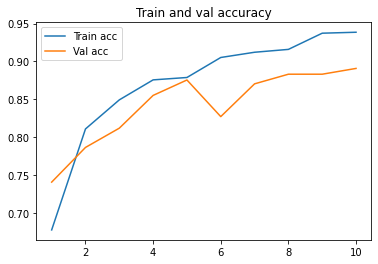

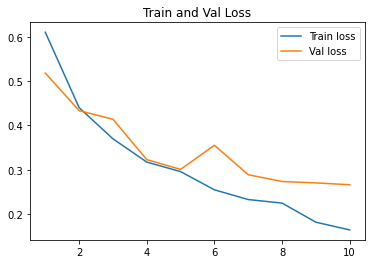

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Train acc')
plt.plot(epochs, val_acc, label='Val acc')
plt.title('Train and val accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.legend()

plt.show()

In [13]:
acc_median = np.median(acc)
acc_median

0.8920953571796417

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [14]:
loss_std = np.std(loss)
loss_std

0.12863841829818676

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations:

Add the following augmentations to your training data generator:
- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [18]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 394 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of the test loss for all the epochs for the model trained with augmentation?

In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data= test_generator)

Epoch 1/10
80/80 [==============================] - 7s 92ms/step - loss: 0.4468 - acc: 0.7873 - val_loss: 0.3904 - val_acc: 0.8249
Epoch 2/10
80/80 [==============================] - 7s 91ms/step - loss: 0.4105 - acc: 0.8174 - val_loss: 0.3825 - val_acc: 0.8198
Epoch 3/10
80/80 [==============================] - 7s 93ms/step - loss: 0.4177 - acc: 0.8156 - val_loss: 0.3987 - val_acc: 0.8147
Epoch 4/10
80/80 [==============================] - 8s 98ms/step - loss: 0.4132 - acc: 0.8149 - val_loss: 0.3483 - val_acc: 0.8325
Epoch 5/10
80/80 [==============================] - 7s 92ms/step - loss: 0.3822 - acc: 0.8287 - val_loss: 0.6946 - val_acc: 0.6777
Epoch 6/10
80/80 [==============================] - 7s 90ms/step - loss: 0.3718 - acc: 0.8287 - val_loss: 0.5095 - val_acc: 0.7868
Epoch 7/10
80/80 [==============================] - 7s 90ms/step - loss: 0.3766 - acc: 0.8363 - val_loss: 0.4634 - val_acc: 0.7944
Epoch 8/10
80/80 [==============================] - 7s 90ms/step - loss: 0.3491 - a

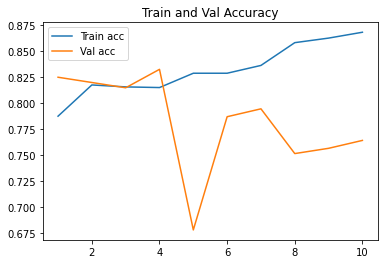

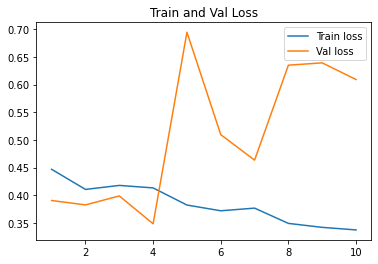

In [20]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, label='Train acc')
plt.plot(epochs_aug, val_acc_aug, label='Val acc')
plt.title('Train and Val Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, label='Train loss')
plt.plot(epochs_aug, val_loss_aug, label='Val loss')
plt.title('Train and Val Loss')
plt.legend()

plt.show()

In [21]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.5070655584335327

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [22]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7705583572387695